In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [2]:
# Useful functions
def IsScalar(x):
    if type(x) in (list, np.ndarray,):
        return False
    else:
        return True

def Thresh(x):
    if IsScalar(x):
        val = 1 if x>0 else -1
    else:
        val = np.ones_like(x)
        val[x<0] = -1.
        '''
        x < 0 This creates a boolean array of the same shape as x, where each element is True if the corresponding element in x is less than 0, and False otherwise.
        val[x < 0]: This selects the elements in val where the condition x < 0 is True
        = -1.: This assigns the value -1. to all selected elements.
        '''
    return val

def Hamming(x, y):
    '''
        d = Hamming(x,y)
        
        Hamming distance between two binary vectors x and y.
        It's the number of digits that differ.
        
        Inputs:
          x and y are arrays of binary vectors, and can be either {0,1} or {-1,1}
        
        Output:
          d is the number of places where the inputs differ
    '''
    d = []
    for xx, yy in zip(x,y):
        dd = 0.
        for xxx,yyy in zip(xx,yy):
            if xxx==1 and yyy!=1:
                dd += 1.
            elif yyy==1 and xxx!=1:
                dd += 1.
        d.append(dd)
    return d

def Perturb(x, p=0.1):
    '''
        y = Perturb(x, p=0.1)
        
        Apply binary noise to x. With probability p, each bit will be randomly
        set to -1 or 1.
        
        Inputs:
          x is an array of binary vectors of {-1,1}
          p is the probability of each bit being randomly flipped
        
        Output:
          y is an array of binary vectors of {-1,1}
    '''
    y = copy.deepcopy(x)
    for yy in y:
        for k in range(len(yy)):
            if np.random.rand()<p:
                yy[k] = Thresh(np.random.randint(2)*2-1)
    return y

Toy Dataset

In [4]:
# 4 Orthogonal Vectors
X = np.array([[ 1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
              [ 1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1],
              [ 1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1],
              [ 1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1],
             ])
N = np.shape(X)[1]
n = np.shape(X)[0]
np.shape(X)

(4, 16)

Bipolar Weight Matrix

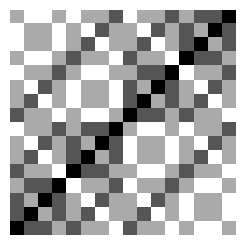

In [6]:
def generate_bipolar_weight():
    # Connection weights and biases
    #b = np.zeros((1,N))
    b = np.sum(X, axis=0) / n
    W = ( X.T @ X ) / n - np.eye(N)
    #W0 = copy.deepcopy(W)
    return W,b

W,b=generate_bipolar_weight()
plt.subplot(121); plt.imshow(W, cmap='gray'); plt.axis('off');

In [75]:
def Update(W, x, b):
    xnew = x @ W - b
    return Thresh(xnew)

In [82]:
# Perturbed memory
k = np.random.randint(len(X))
Y = Perturb( X , p=0.4 )
x = Y[k:k+1,]
err = Hamming(x, X[k:k+1,:])
print('Class '+str(k)+' with '+str(err)+' errors')
x_orig = copy.deepcopy(x)
print(x_orig)

# Notice how the inner product of the perturbed vector is almost
# othogonal to all the other equilibria. ie. relatively close to zero
print('Inner Products: '+str(x@X.T))

Class 0 with [4.0] errors
[[-1  1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1]]
Inner Products: [[ 8 -4 -8  0]]


In [83]:
if True:
    x = copy.deepcopy(x_orig)
    n_iters = 10
    for k in range(n_iters):
        #print(x)
        x_new = Update(W, x, b)
        print(Hamming(x, x_new))
        x = x_new

[5.0]
[1.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]


In [84]:
for idx,t in enumerate(X):
    d = Hamming(x, [t])[0]
    print('Memory '+str(idx)+' has error '+str(d))

Memory 0 has error 8.0
Memory 1 has error 8.0
Memory 2 has error 16.0
Memory 3 has error 8.0
